out at:  92


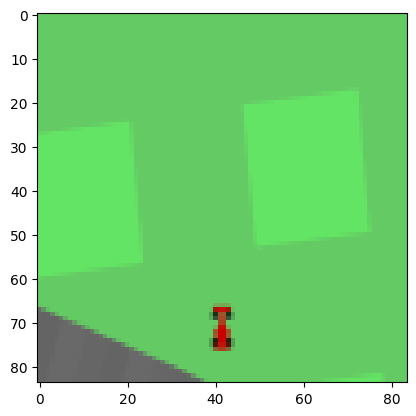

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.client import device_lib
env = gym.make('CarRacing-v2')

state, _ = env.reset()
state = state[:84, 6:90, :]
state = np.dot(np.array(state), [0.2989, 0.5870, 0.1140])

def get_available_devices():
    gpus =  device_lib.list_local_devices()
    if gpus:
        try:    
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        except RuntimeError as e:
            print("no")

def is_out_of_track(img_rgb):
        # Check if the car is out of the track
        # Define the off-track color range (e.g., green areas)
        out_sum = (img_rgb[80, 35:48, 1][:2] > 200).sum() + (img_rgb[75, 35:48, 1][-2:] > 200).sum()
        return out_sum == 4

action = np.array([0,1,0])

for _ in range(30):
    img_rgb, _, done, _, _ = env.step(np.array([0, 0, 0]))
     
for i in range(100):
    next_state, reward, terminated, truncated, _ = env.step(action)
    next_state = next_state[:84, 6:90, :]
    
    
    if is_out_of_track(next_state):
        print("out at: ", i )
        plt.figure()
        plt.imshow(next_state)
        break
    
    
